# Workflow

## Coverage

1. data (prepare and load)
2. build model
3. fitting the model to data (training)
4. making predictions and evaluating a model (inference)
5. putting in all together

## Import Packages

In [3]:
import torch
from torch import nn # nn contains all the building block of a nerual network
import matplotlib.pyplot as plt

torch.__version__

'2.4.0'

## Preparing and Loading

Data can be almost anything... in machine learning. 

- Excel speadsheet
- Images of any kind
- Videos (youtube has lots of data)
- Audio like songs or podcasts
- DNA
- Text

Machine learning is a game of two parts:

1. Get data into a numerical representation
2. Build a model to learn patterns in that numerical representation

To showcase this, let's create some known data using the linear regression formula. We will use a linear regression formula to make a straight line with known parameters. 

In [4]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### Splitting Data into Training and Test Sets

Let's create a training and test set with our data.

In [5]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [6]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

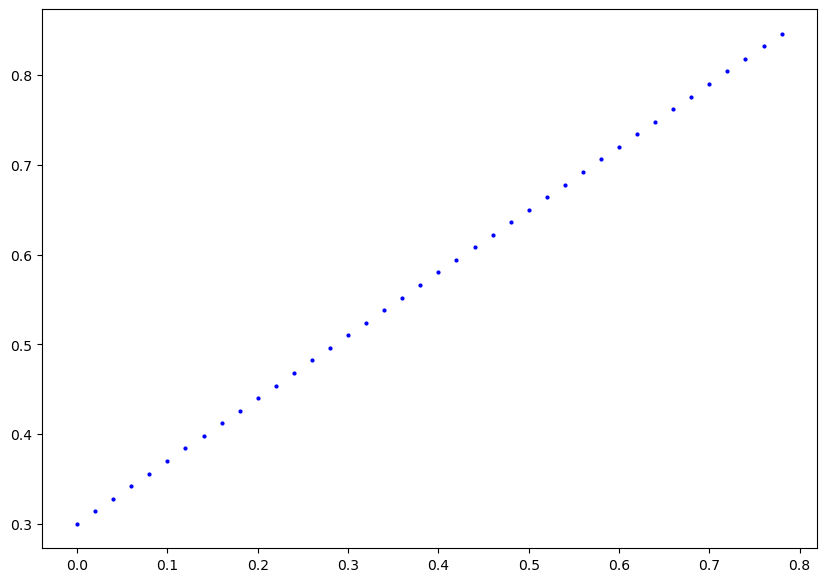

In [8]:
plot_predictions()

## Build Model

That's our first PyTorch model! This is very exciting, let's do it.

What out model does: 

- Start with random values (weight & bias)
- Look at training data and adjust the random values to better represent (or get closer to) the ideal values (the weight & bias values we used to create the data)

How does it do? Through two main algorithms: 

1. Gradient descent
2. Backpropagation

In [ ]:
# Create lineaer regression model class
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))
        # Forward method to define the computation in the model
        def forward(self, x: torch.Tensor) -> torch.Tensor:
            return self.weights * x + self.bias